In [1]:
%pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 3.7/390.3 MB 54.1 MB/s eta 0:00:08
   -- ------------------------------------- 19.9/390.3 MB 54.6 MB/s eta 0:00:07
   --- ------------------------------------ 31.5/390.3 MB 55.4 MB/s eta 0:00:07
   ---- ----------------------------------- 41.9/390.3 MB 54.4 MB/s eta 0:00:07
   ----- ---------------------------------- 54.8/390.3 MB 56.3 MB/s eta 0:00:06
   ------ --------------------------------- 67.1/390.3 MB 57.0 MB/s eta 0:00:06
   -------- ------------------------------- 81.3/390.3 MB 58.2 MB/s eta 0:00:06
   --------- ------------------------------ 94.4/390.3 MB 59.0 MB/s eta 0:00:06
   ---------- ---------------------------- 107.5/390.3 MB 59.7 MB/s eta 0:00:05
   ------------ -------------------------- 121.1/390.3 MB 60.4 MB/s eta 0:00:05
   ------------- ------------------------- 133.2/390.3 MB 60.3 MB/s

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import glob

In [9]:
path = './data/'

In [ ]:
df_price = pd.read_csv(path + '甘藍初秋_台北一日交易行情.csv')
df_price.head()
###只需要用到民國104(2015)~113(2024)

,日期,市場,產品,上價,中價,下價,平均價,增減%,交易量(公斤),增減%.1
0,085/01/01,109 台北一,LA1 甘藍 初秋,12.0,9.0,6.0,8.8,-,"75,779",-
1,085/01/02,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,11.2,27,"58,780",-22
2,085/01/03,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,10.1,-10,"103,999",77
3,085/01/05,109 台北一,LA1 甘藍 初秋,11.0,9.0,7.0,8.1,-,"108,342",-
4,085/01/06,109 台北一,LA1 甘藍 初秋,10.0,8.0,6.0,7.9,-2,"113,928",5


In [ ]:
df_typhoon = pd.read_csv(path + 'typhoon_data.csv')
df_typhoon.head()
## 2015~2024

,年份,颱風編號,颱風名稱,颱風生命期間,颱風生命期間中心最低氣壓(hPa),颱風生命期間中心最大風速(m/s),颱風生命期間最大7級風暴風半徑(km),颱風生命期間最大10級風暴風半徑(km),警報發布報數
0,2024,202426,帕布(PABUK),2024-12-23 06:00~2024-12-25 00:00,1000,18,80,---,---
1,2024,202425,天兔(USAGI),2024-11-11 18:00~2024-11-16 03:00,945,45,150,50,19
2,2024,202424,萬宜(MAN-YI),2024-11-09 06:00~2024-11-20 00:00,900,60,180,90,---
3,2024,202423,桔梗(TORAJI),2024-11-09 06:00~2024-11-14 06:00,965,38,150,50,---
4,2024,202422,銀杏(YINXING),2024-11-03 18:00~2024-11-12 06:00,930,51,180,90,---


In [15]:
path = './data/daily_min_temperature/'
df_mintemp = pd.read_csv(path + '466920-2016-MinAirTemperature-day.csv')
df_mintemp.head()

,日/月,1,2,3,4,5,6,7,8,9,10,11,12
0,01,16.5 / 2016/01/01 01:31:00,11.7 / 2016/02/01 22:49:00,12.8 / 2016/03/01 00:16:00,18.2 / 2016/04/01 00:19:00,21.0 / 2016/05/01 05:31:00,28.8 / 2016/06/01 04:35:00,27.2 / 2016/07/01 04:31:00,27.2 / 2016/08/01 02:27:00,25.1 / 2016/09/01 05:47:00,27.2 / 2016/10/01 03:53:00,20.8 / 2016/11/01 18:04:00,18.7 / 2016/12/01 16:37:00
1,02,17.2 / 2016/01/02 05:50:00,11.5 / 2016/02/02 00:58:00,13.9 / 2016/03/02 04:53:00,19.2 / 2016/04/02 05:53:00,22.2 / 2016/05/02 03:26:00,25.9 / 2016/06/02 11:23:00,25.9 / 2016/07/02 15:29:00,28.1 / 2016/08/02 22:42:00,26.0 / 2016/09/02 18:19:00,26.2 / 2016/10/02 06:06:00,19.2 / 2016/11/02 05:16:00,18.8 / 2016/12/02 05:01:00
2,03,18.3 / 2016/01/03 03:52:00,12.7 / 2016/02/03 00:01:00,14.1 / 2016/03/03 05:15:00,21.1 / 2016/04/03 05:36:00,24.7 / 2016/05/03 04:15:00,25.9 / 2016/06/03 01:18:00,24.8 / 2016/07/03 17:31:00,27.0 / 2016/08/03 04:23:00,26.1 / 2016/09/03 04:09:00,25.6 / 2016/10/03 06:34:00,19.5 / 2016/11/03 03:51:00,19.0 / 2016/12/03 00:02:00
3,04,18.7 / 2016/01/04 01:04:00,14.6 / 2016/02/04 06:10:00,15.9 / 2016/03/04 06:26:00,21.4 / 2016/04/04 19:43:00,24.7 / 2016/05/04 02:41:00,27.6 / 2016/06/04 05:27:00,25.9 / 2016/07/04 04:43:00,27.3 / 2016/08/04 05:43:00,27.1 / 2016/09/04 05:58:00,25.5 / 2016/10/04 04:36:00,20.9 / 2016/11/04 09:23:00,21.2 / 2016/12/04 05:29:00
4,05,19.0 / 2016/01/05 02:57:00,13.4 / 2016/02/05 21:33:00,17.5 / 2016/03/05 05:46:00,21.4 / 2016/04/05 00:02:00,24.3 / 2016/05/05 18:29:00,24.6 / 2016/06/05 17:01:00,27.4 / 2016/07/05 05:40:00,27.9 / 2016/08/05 05:37:00,27.5 / 2016/09/05 01:30:00,26.0 / 2016/10/05 03:12:00,19.8 / 2016/11/05 03:20:00,21.2 / 2016/12/05 23:34:00


In [22]:
import pandas as pd
import os

# 定義檔案路徑
input_path = './data/daily_min_temperature/'
output_path = './data/cleaned_min_temperature/'

# 如果輸出目錄不存在，則創建它
if not os.path.exists(output_path):
    os.makedirs(output_path)

# 要處理的年份
years = range(2016, 2025)

# 批量處理每個檔案
for year in years:
    file_name = f'466920-{year}-MinAirTemperature-day.csv'
    input_file = os.path.join(input_path, file_name)

    # 讀取 CSV 檔案
    df = pd.read_csv(input_file)

    # 清理溫度欄位，只保留 `/` 前的數字
    df_cleaned = df.applymap(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)

    # 輸出清理後的數據到新的 CSV 文件
    output_file = os.path.join(output_path, f'{file_name}')
    df_cleaned.to_csv(output_file, index=False)

    print(f"已處理並儲存：{output_file}")

print("所有檔案已成功處理！")


已處理並儲存：./data/cleaned_min_temperature/466920-2016-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2017-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2018-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2019-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2020-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2021-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2022-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2023-MinAirTemperature-day.csv
已處理並儲存：./data/cleaned_min_temperature/466920-2024-MinAirTemperature-day.csv
所有檔案已成功處理！


C:\Users\User\AppData\Local\Temp\ipykernel_21404\2865284357.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)
C:\Users\User\AppData\Local\Temp\ipykernel_21404\2865284357.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)
C:\Users\User\AppData\Local\Temp\ipykernel_21404\2865284357.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)
C:\Users\User\AppData\Local\Temp\ipykernel_21404\2865284357.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)
C:\Users\User\AppDat

In [23]:
path = './data/cleaned_min_temperature/'
df_mintemp = pd.read_csv(path + '466920-2016-MinAirTemperature-day.csv')
df_mintemp.head()

,日/月,1,2,3,4,5,6,7,8,9,10,11,12
0,01,16.5,11.7,12.8,18.2,21.0,28.8,27.2,27.2,25.1,27.2,20.8,18.7
1,02,17.2,11.5,13.9,19.2,22.2,25.9,25.9,28.1,26.0,26.2,19.2,18.8
2,03,18.3,12.7,14.1,21.1,24.7,25.9,24.8,27.0,26.1,25.6,19.5,19.0
3,04,18.7,14.6,15.9,21.4,24.7,27.6,25.9,27.3,27.1,25.5,20.9,21.2
4,05,19.0,13.4,17.5,21.4,24.3,24.6,27.4,27.9,27.5,26.0,19.8,21.2


In [21]:
path = './data/daily_precipitation/'
df_precipitation = pd.read_csv(path + '466920-2015-Precipitation-day.csv')
df_precipitation.head()

,日/月,1,2,3,4,5,6,7,8,9,10,11,12
0,01,0.0,0.0,2.0,0.0,2.4,0.2,0.0,0.0,24.2,0.0,1.2,0.0
1,02,0.0,0.0,T,0.0,1.3,0.0,0.0,0.0,0.0,58.8,T,0.0
2,03,0.0,3.5,T,0.0,1.1,0.0,0.0,0.0,T,0.0,0.7,0.0
3,04,0.0,3.0,1.0,0.0,39.6,0.9,1.3,0.0,T,0.0,1.0,0.2
4,05,0.0,4.0,1.5,0.0,41.3,0.0,0.0,17.2,0.0,0.0,0.0,T


低溫和甘藍菜價的關係

In [5]:
import pandas as pd

# 定義檔案路徑
price_file = './data/甘藍初秋_台北一日交易行情.csv'
temperature_file = './data/cleaned_min_temperature/466920-2016-MinAirTemperature-day.csv'

# 讀取資料
price_df = pd.read_csv(price_file, encoding='utf-8')
temperature_df = pd.read_csv(temperature_file, encoding='utf-8', header=0)

# 1. 菜價資料：民國日期轉換為西元日期
def convert_date_to_gregorian(minguo_date):
    try:
        year, month, day = map(int, minguo_date.split('/'))
        return f"{year + 1911:04d}-{month:02d}-{day:02d}"  # 西元日期格式 YYYY-MM-DD
    except Exception as e:
        print(f"日期轉換錯誤: {minguo_date}, {e}")
        return None

price_df['日期'] = price_df['日期'].apply(convert_date_to_gregorian)

# 檢查菜價資料是否正確
print("菜價資料日期範圍：")
print(price_df['日期'].unique())

# 2. 溫度資料處理
# 去掉最後一行極端值
temperature_df = temperature_df.iloc[:-1, :]

# 寬表轉長表
temperature_df = temperature_df.melt(id_vars=['日/月'], var_name='月份', value_name='溫度')

# 清理數據：剔除缺失值和無效數據
temperature_df = temperature_df.dropna(subset=['日/月', '溫度'])  # 去掉缺失值
temperature_df['日/月'] = temperature_df['日/月'].astype(int)  # 確保日為數字
temperature_df['月份'] = temperature_df['月份'].astype(int)  # 確保月份為數字

# 拼接完整日期
temperature_df['日期'] = pd.to_datetime(
    '2016-' + temperature_df['月份'].astype(str) + '-' + temperature_df['日/月'].astype(str),
    errors='coerce'
).dt.strftime('%Y-%m-%d')

# 檢查溫度資料是否正確
print("溫度資料日期範圍：")
print(temperature_df['日期'].unique())

# 剔除無效日期
temperature_df = temperature_df.dropna(subset=['日期'])

# 3. 合併數據
merged_df = pd.merge(price_df, temperature_df[['日期', '溫度']], on='日期', how='inner')

# 檢查合併後的數據
print("合併後的數據：")
print(merged_df.head())

# 4. 清理數據
merged_df = merged_df[['日期', '平均價', '中價', '下價', '溫度']]

# 保存結果
merged_df.to_csv('./data/merged_price_temperature.csv', index=False, encoding='utf-8')

print("菜價與地溫度的數據已成功合併並保存！")




菜價資料日期範圍：
['1996-01-01' '1996-01-02' '1996-01-03' ... '2025-01-09' '2025-01-10'
 '2025-01-11']
溫度資料日期範圍：
['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-01-06' '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10'
 '2016-01-11' '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15'
 '2016-01-16' '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20'
 '2016-01-21' '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25'
 '2016-01-26' '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30'
 '2016-01-31' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-06' '2016-02-07' '2016-02-08' '2016-02-09'
 '2016-02-10' '2016-02-11' '2016-02-12' '2016-02-13' '2016-02-14'
 '2016-02-15' '2016-02-16' '2016-02-17' '2016-02-18' '2016-02-19'
 '2016-02-20' '2016-02-21' '2016-02-22' '2016-02-23' '2016-02-24'
 '2016-02-25' '2016-02-26' '2016-02-27' '2016-02-28' '2016-02-29' nan
 '2016-03-01' '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05'
 '2016-03-06' '2016-03-07' '2016-

In [7]:
import pandas as pd

# 定義檔案路徑
merged_file = './data/merged_price_temperature.csv'

# 讀取合併後的資料
merged_df = pd.read_csv(merged_file, encoding='utf-8')

# 顯示合併後的完整資料
print("合併後的資料（完整）：")
print(merged_df)


合併後的資料（完整）：
             日期  平均價   中價   下價    溫度
0    2016-01-01  6.2  5.8  3.6  16.5
1    2016-01-02  8.5  7.9  6.5  17.2
2    2016-01-03  6.7  6.3  4.0  18.3
3    2016-01-05  6.1  5.8  3.6  19.0
4    2016-01-06  4.4  4.0  1.9  17.1
..          ...  ...  ...  ...   ...
296  2016-12-27  7.7  7.2  5.8  12.6
297  2016-12-28  6.9  6.4  5.2  12.6
298  2016-12-29  8.4  8.1  7.3  15.1
299  2016-12-30  7.5  7.5  6.3  16.0
300  2016-12-31  6.2  5.9  4.8  18.0

[301 rows x 5 columns]


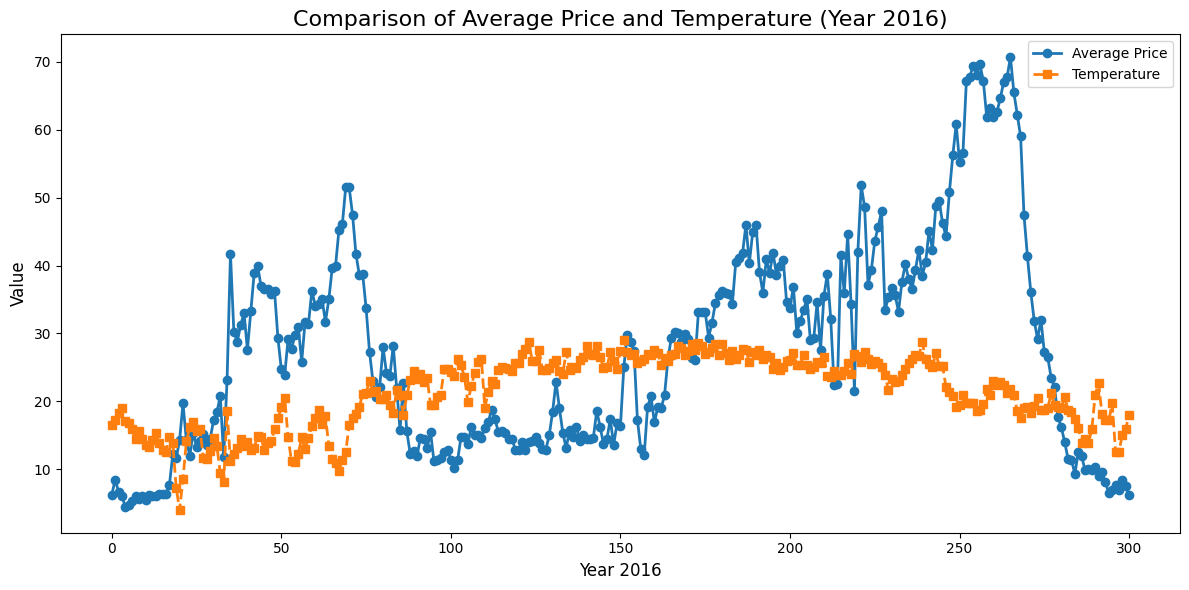

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取合併後的數據
merged_file = './data/merged_price_temperature.csv'
merged_df = pd.read_csv(merged_file, encoding='utf-8')

# 繪製線性圖
plt.figure(figsize=(12, 6))

# Plot average price
plt.plot(merged_df.index, merged_df['平均價'], label='Average Price', marker='o', linestyle='-', linewidth=2)

# Plot temperature
plt.plot(merged_df.index, merged_df['溫度'], label='Temperature', marker='s', linestyle='--', linewidth=2)

# Beautify the plot
plt.title('Comparison of Average Price and Temperature (Year 2016)', fontsize=16)
plt.xlabel('Year 2016', fontsize=12)  # X-axis shows "Year 2016" only
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
import pandas as pd

# 定義檔案路徑
precipitation_file = './data/daily_precipitation/466920-2016-Precipitation-day.csv'
merged_file = './data/merged_price_temperature.csv'

# 讀取降雨量和合併表資料
precipitation_df = pd.read_csv(precipitation_file, encoding='utf-8', header=0)
merged_df = pd.read_csv(merged_file, encoding='utf-8')

# 1. 清理降雨量數據
# 去掉最後一行極端值
precipitation_df = precipitation_df.iloc[:-1, :]

# 將 T 替換為 0，並確保數據為浮點數
precipitation_df = precipitation_df.replace('T', 0).astype(float, errors='ignore')

# 寬表轉長表
precipitation_df = precipitation_df.melt(id_vars=['日/月'], var_name='月份', value_name='降雨量')

# 清理數據
precipitation_df = precipitation_df.dropna(subset=['日/月', '降雨量'])  # 去掉缺失值
precipitation_df['日/月'] = precipitation_df['日/月'].astype(int)  # 確保日為數字
precipitation_df['月份'] = precipitation_df['月份'].astype(int)  # 確保月份為數字

# 拼接完整日期
precipitation_df['日期'] = pd.to_datetime(
    '2016-' + precipitation_df['月份'].astype(str) + '-' + precipitation_df['日/月'].astype(str),
    errors='coerce'
).dt.strftime('%Y-%m-%d')

# 剔除無效日期
precipitation_df = precipitation_df.dropna(subset=['日期'])

# 2. 合併降雨量到已合併表
merged_df = pd.merge(merged_df, precipitation_df[['日期', '降雨量']], on='日期', how='left')

# 3. 保存最終合併結果
output_file = './data/merged_price_temperature_precipitation.csv'
merged_df.to_csv(output_file, index=False, encoding='utf-8')

# 確認數據
print("合併後的數據：")
print(merged_df.head())

print(f"合併後的數據已保存到: {output_file}")


合併後的數據：
           日期  平均價   中價   下價    溫度   降雨量
0  2016-01-01  6.2  5.8  3.6  16.5   0.0
1  2016-01-02  8.5  7.9  6.5  17.2     0
2  2016-01-03  6.7  6.3  4.0  18.3  15.0
3  2016-01-05  6.1  5.8  3.6  19.0   0.7
4  2016-01-06  4.4  4.0  1.9  17.1  32.1
合併後的數據已保存到: ./data/merged_price_temperature_precipitation.csv


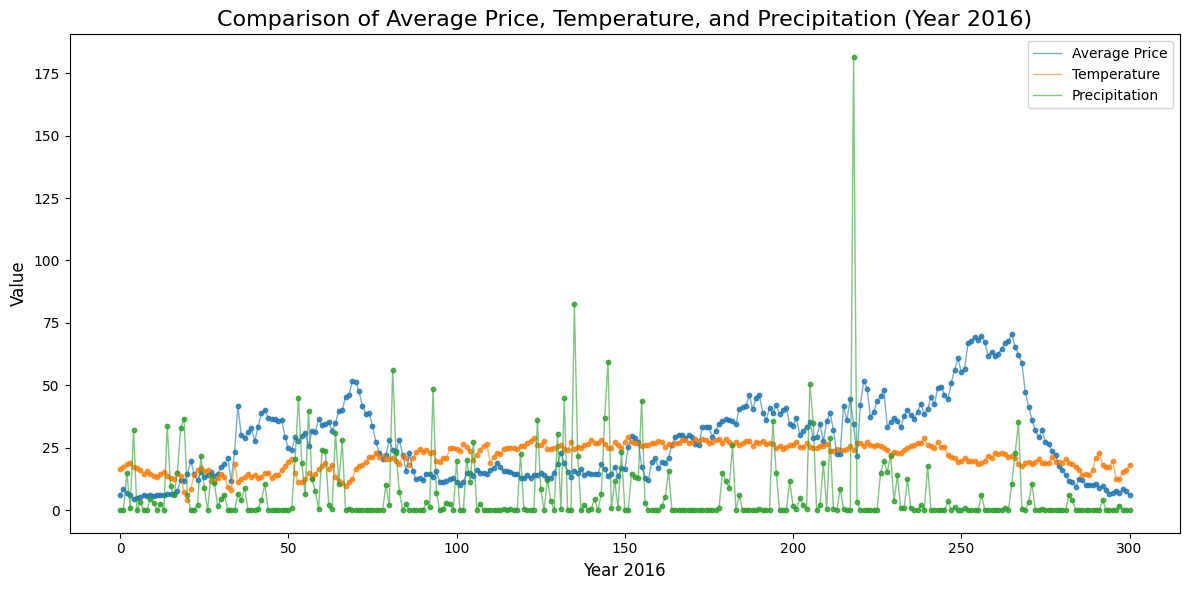

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取合併後的數據
merged_file = './data/merged_price_temperature_precipitation.csv'
merged_df = pd.read_csv(merged_file, encoding='utf-8')

# 繪製圖表
plt.figure(figsize=(12, 6))

# 平均價
plt.plot(merged_df.index, merged_df['平均價'], label='Average Price', linestyle='-', alpha=0.6, linewidth=1)
plt.scatter(merged_df.index, merged_df['平均價'], s=10, alpha=0.8)

# 溫度
plt.plot(merged_df.index, merged_df['溫度'], label='Temperature', linestyle='-', alpha=0.6, linewidth=1)
plt.scatter(merged_df.index, merged_df['溫度'], s=10, alpha=0.8)

# 降雨量
plt.plot(merged_df.index, merged_df['降雨量'], label='Precipitation', linestyle='-', alpha=0.6, linewidth=1)
plt.scatter(merged_df.index, merged_df['降雨量'], s=10, alpha=0.8)

# 圖表美化
plt.title('Comparison of Average Price, Temperature, and Precipitation (Year 2016)', fontsize=16)
plt.xlabel('Year 2016', fontsize=12)  # X 軸顯示 Year 2016
plt.ylabel('Value', fontsize=12)  # Y 軸顯示 Value
plt.legend()
plt.tight_layout()

# 顯示圖表
plt.show()



預處理csv

訓練模型

In [2]:
# Step 1: 整合所有 CSV 文件
file_paths = glob.glob("data/train.csv")  # 修改為您的實際文件路徑模式
all_data = pd.DataFrame()

for file in file_paths:
    data = pd.read_csv(file)
    all_data = pd.concat([all_data, data], ignore_index=True)

print(f"數據集大小: {all_data.shape}")

# Step 2: 數據預處理
# 假設數據集包含 '日期' 和 '目標值' 列，您需要根據實際數據進行修改
all_data['日期'] = pd.to_datetime(all_data['日期'])  # 確保日期列格式正確

# 按日期排序
all_data = all_data.sort_values(by='日期')

# 填補缺失值
all_data = all_data.fillna(method='ffill').fillna(method='bfill')

# 特徵工程（這部分需要根據您的數據具體修改）
all_data['year'] = all_data['日期'].dt.year
all_data['month'] = all_data['日期'].dt.month
all_data['day'] = all_data['日期'].dt.day

# 歸一化目標值
scaler = MinMaxScaler(feature_range=(0, 1))
all_data['目標值'] = scaler.fit_transform(all_data[['目標值']])

# Step 3: 數據分割
# 篩選數據集
train_data = all_data[(all_data['year'] >= 2014) & (all_data['year'] <= 2020)]
val_data = all_data[(all_data['year'] == 2021) | (all_data['year'] == 2022)]
test_data = all_data[all_data['year'] == 2023]

# 創建時間序列數據
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])
        y.append(data[i + sequence_length, -1])
    return np.array(X), np.array(y)

sequence_length = 30  # 使用過去 30 天的數據進行預測

# 訓練數據
train_values = train_data[['目標值']].values
X_train, y_train = create_sequences(train_values, sequence_length)

# 驗證數據
val_values = val_data[['目標值']].values
X_val, y_val = create_sequences(val_values, sequence_length)

# 測試數據
test_values = test_data[['目標值']].values
X_test, y_test = create_sequences(test_values, sequence_length)

# Step 4: 構建 LSTM 模型
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 5: 模型訓練
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Step 6: 模型評估
y_test_pred = model.predict(X_test)

# 將數據反轉回原始尺度
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R2: {r2:.2f}")

# Step 7: 保存模型
import joblib
joblib.dump(model, 'trained_lstm_model.h5')

數據集大小: (0, 0)


KeyError: '日期'

In [ ]:
# Step 8: 可視化結果
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_test_pred, label='Predictions')
plt.legend()
plt.title('LSTM Predictions vs True Values')
plt.show()